In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\BHARATH N\Downloads\loan_default.csv', header = 0)

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
df.drop(columns=['LoanID'], inplace=True)

In [11]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [13]:
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
binary_features = ['HasMortgage', 'HasDependents', 'HasCoSigner']

In [15]:
for col in binary_features:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [17]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [19]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [21]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,False,False,False,True,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,False,True,False,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,False,False,False,True,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,False,False,False,False,False,False


In [23]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [25]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,1,...,False,False,False,False,False,False,False,False,False,True
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0,...,False,False,False,False,True,False,False,False,False,True
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1,...,False,False,False,True,False,False,False,False,False,False
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0,...,False,False,False,False,True,False,True,False,False,False
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,False,False,False,True,False,False,False,False,False,False


In [27]:
print(df['Default'].value_counts())

Default
0    225694
1     29653
Name: count, dtype: int64


In [29]:
X = df.drop(columns=['Default'])
y = df['Default']
print(y.value_counts())

Default
0    225694
1     29653
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(204277, 24) (51070, 24) (204277,) (51070,)


In [33]:
print(X_train.isnull().sum())

Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
HasMortgage                     0
HasDependents                   0
HasCoSigner                     0
Education_High School           0
Education_Master's              0
Education_PhD                   0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8853730174270609

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070


Confusion Matrix:
 [[45036   103]
 [ 5751   180]]


In [43]:
joblib.dump(rf_model,r"C:\Users\BHARATH N\Downloads\random_forest_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



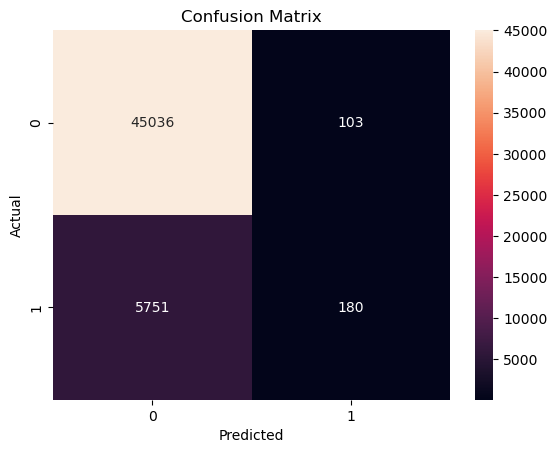

In [47]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

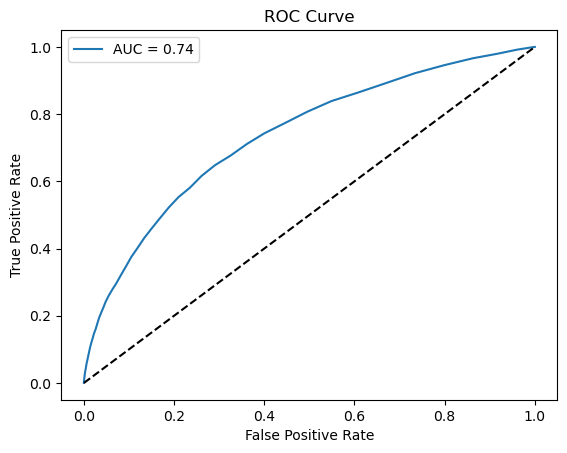

In [49]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

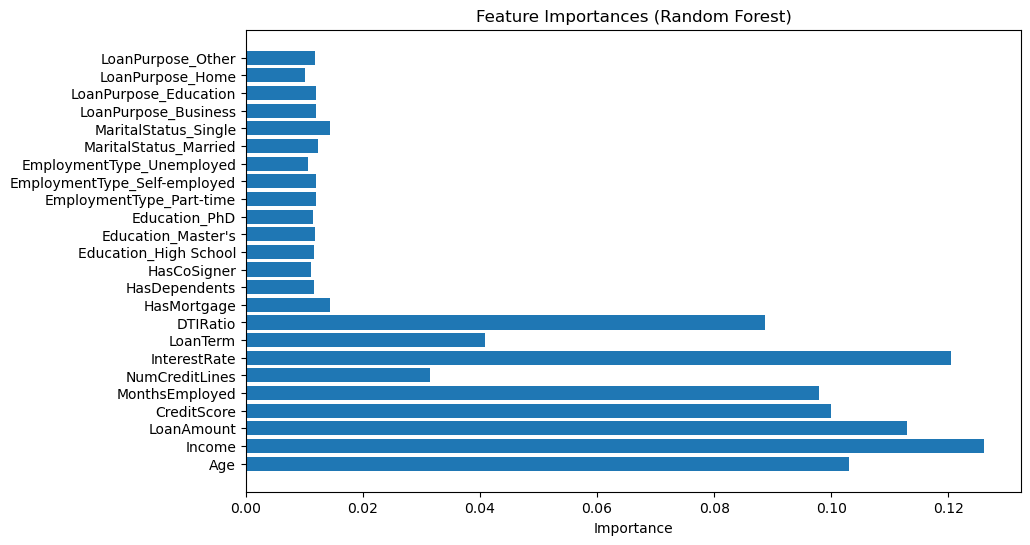

In [51]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



In [55]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, "final_rf_model.pkl")

In [ ]:
def predict_default(sample):
    model = joblib.load("final_rf_model.pkl")
    return model.predict(sample)